# 將不同卡種的出入站時間繪製分布圖，觀察其差異

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

env: KERAS_BACKEND=tensorflow


In [54]:
df_rational = pd.read_csv("C:/Users/USER/Desktop/0315運具資料/合理旅次_訓練格式_時間地點.csv", encoding='utf-8', engine='python')
df_rational = df_rational.drop(['Unnamed: 0'], axis=True)
df_rational = df_rational.loc[df_rational['最後一次出站時間'] > df_rational['最後一次進站時間']]
df_rational['第一次時間差'] = (df_rational['第一次出站時間'] - df_rational['第一次進站時間'])*1440
df_rational['最後一次時間差'] = (df_rational['最後一次出站時間'] - df_rational['最後一次進站時間'])*1440
df_rational.head()

,第一次進站地點,第一次出站地點,第一次進站時間,第一次出站時間,最後一次進站時間,最後一次出站時間,卡種,第一次時間差,最後一次時間差
0,83,24,0.229861,0.283333,0.709722,0.744444,1,77.0,50.0
1,61,29,0.230556,0.252083,0.656944,0.663194,1,31.0,9.0
2,91,11,0.230556,0.273611,0.837500,0.863889,1,62.0,38.0
3,91,107,0.231250,0.279167,0.711111,0.743750,1,69.0,47.0
4,83,66,0.231250,0.277083,0.694444,0.722222,2,66.0,40.0


In [67]:
df_rational1 = df_rational.loc[df_rational['卡種'] == 1]
df_rational6 = df_rational.loc[df_rational['卡種'] == 6]
df_rationalother = df_rational.loc[~df_rational['卡種'].isin([1, 6])]

## 不同卡種 第一次進站時間分布圖

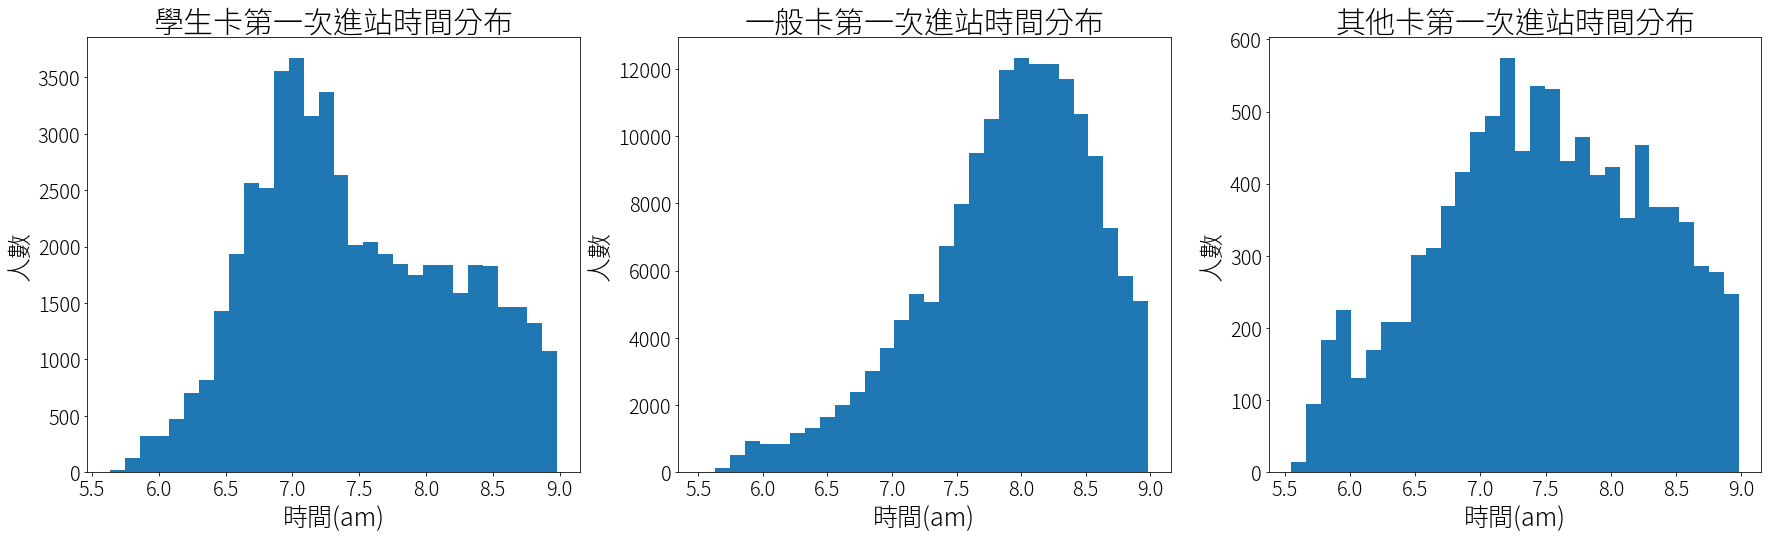

In [85]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 3, 1)
plt.hist(df_rational6['第一次進站時間']*1440/60, bins=30)
plt.xlabel("時間(am)", fontsize=25)
plt.xticks(fontsize=20, rotation=0)
plt.ylabel("人數", fontsize=25)
plt.yticks(fontsize=20, rotation=0)
plt.title("學生卡第一次進站時間分布", fontsize=30);

plt.subplot(1, 3, 2)
plt.hist(df_rational1['第一次進站時間']*1440/60, bins=30)
plt.xlabel("時間(am)", fontsize=25)
plt.xticks(fontsize=20, rotation=0)
plt.ylabel("人數", fontsize=25)
plt.yticks(fontsize=20, rotation=0)
plt.title("一般卡第一次進站時間分布", fontsize=30);


plt.subplot(1, 3, 3)
plt.hist(df_rationalother['第一次進站時間']*1440/60, bins=30)
plt.xlabel("時間(am)", fontsize=25)
plt.xticks(fontsize=20, rotation=0)
plt.ylabel("人數", fontsize=25)
plt.yticks(fontsize=20, rotation=0)
plt.title("其他卡第一次進站時間分布", fontsize=30);

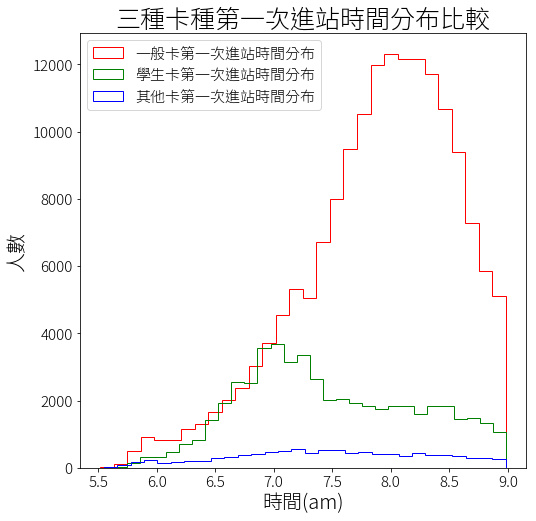

In [112]:
plt.figure(figsize=(8, 8))
plt.hist(df_rational1['第一次進站時間']*1440/60, bins=30, histtype='step', label='一般卡第一次進站時間分布', color='red')
plt.hist(df_rational6['第一次進站時間']*1440/60, bins=30, histtype='step', label='學生卡第一次進站時間分布', color='green')
plt.hist(df_rationalother['第一次進站時間']*1440/60, bins=30, histtype='step', label='其他卡第一次進站時間分布', color='blue')

plt.xlabel("時間(am)", fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel("人數", fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.legend(loc='upper left', fontsize=15)
plt.title("三種卡種第一次進站時間分布比較", fontsize=25);
plt.savefig('C:/Users/USER/Desktop/0315運具資料/三種卡種第一次進站時間分布比較.png')

## 不同卡種 最後一次進站時間分布圖

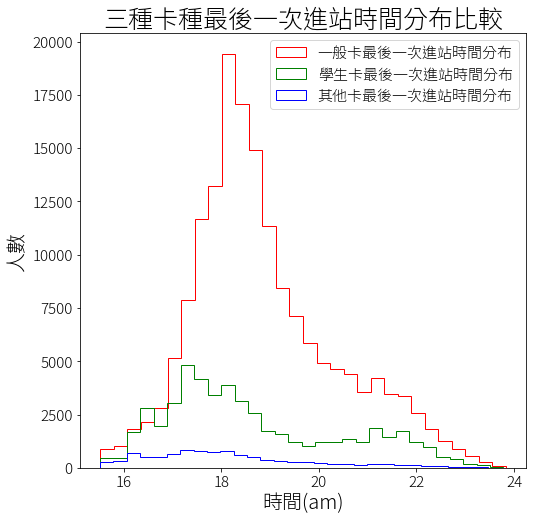

In [113]:
plt.figure(figsize=(8, 8))
plt.hist(df_rational1['最後一次進站時間']*1440/60, bins=30, histtype='step', label='一般卡最後一次進站時間分布', color='red')
plt.hist(df_rational6['最後一次進站時間']*1440/60, bins=30, histtype='step', label='學生卡最後一次進站時間分布', color='green')
plt.hist(df_rationalother['最後一次進站時間']*1440/60, bins=30, histtype='step', label='其他卡最後一次進站時間分布', color='blue')
plt.xlabel("時間(am)", fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel("人數", fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.legend(loc='upper right', fontsize=15)
plt.title("三種卡種最後一次進站時間分布比較", fontsize=25);
plt.savefig('C:/Users/USER/Desktop/0315運具資料/三種卡種最後一次進站時間分布比較.png')